In [1]:
from PIL import Image
from ultralytics import YOLO
from ultralytics.yolo.utils.ops import crop_mask, clip_segments
import numpy as np
import pandas as pd
from copy import deepcopy

In [2]:
import matplotlib.pyplot as plt
import cv2

In [13]:
model = YOLO("yolov8s-seg.pt")

In [4]:
image = cv2.imread('people_test.jpg')

In [5]:
frame = deepcopy(image)

In [59]:
results = model.predict(image, save=False)


0: 256x640 3 persons, 584.9ms
Speed: 21.0ms pre-process, 584.9ms inference, 34.8ms postprocess per image at shape (1, 3, 640, 640)


In [61]:
results1 = results[0]


In [62]:
masks = results1.masks.masks.numpy()
boxes = results1.boxes.xyxy.numpy()

len(masks), len(boxes)

(3, 3)

In [35]:
def crop_segmentation(segment,box,image):
    img = image.copy()
    box = box.astype(int)
    w,h,c = img.shape
    mask = (cv2.resize(segment,(h,w)) > 0).astype("uint8")
    img_segm = cv2.bitwise_and(img,img,mask=mask)
    img_segm = img_segm[box[1]:box[3],box[0]:box[2]]
    return cv2.cvtColor(img_segm, cv2.COLOR_BGR2RGB)


0


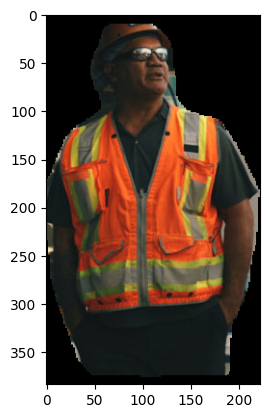

1


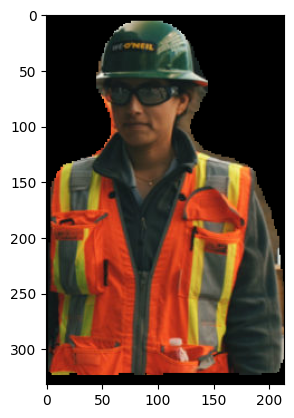

2


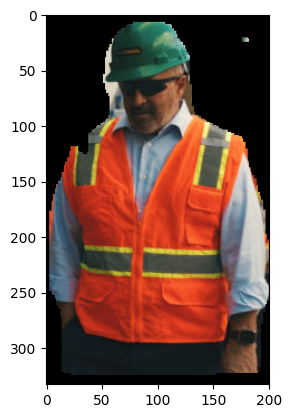

3


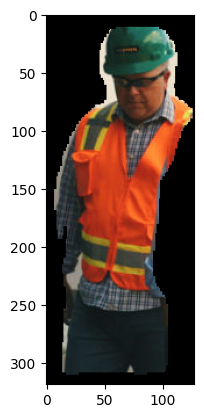

4


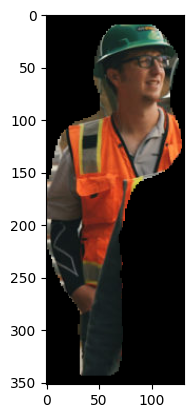

5


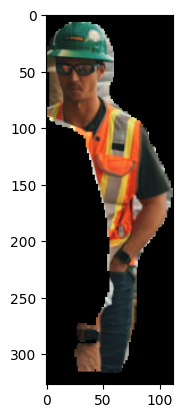

In [36]:
for i in range(len(boxes)):
    print(i)
    plt.imshow(crop_segmentation(masks[i],boxes[i],frame))
    plt.show()

In [ ]:
from torchvision import transforms

In [ ]:
preprocess = transforms.Compose([
            transforms.Resize((128,64)),
            # transforms.ToTensor()
        ])

In [ ]:
cropped = [crop_segmentation(i[0],i[1],frame) for i in zip(masks,boxes)]

In [ ]:
preprocess(Image.fromarray(cropped[0]))

In [ ]:
preprocess(Image.fromarray(cropped[1]))

In [ ]:
from model.SiameseReId import SiameseReId

In [ ]:
siamese_net = SiameseReId(os.path.join('model','weights','model_final.pt'))

In [ ]:
df = pd.DataFrame(columns=["features"])

print(df)

detections = np.random.randint(100, size=4)
print("Images: ", detections, "\n")

for det in detections:
    similarities = pd.DataFrame(columns=["track_id", "prob"])
    print("Detected image: ", det, "\n")

    vector = np.random.randint(100, size=4) # torch.model.densnet1(det) dall'immagine estrapolo il feature vector

    if df.empty:
        # vector = np.random.randint(100, size=4) # torch.model.densnet1(det) dall'immagine estrapolo il feature vector
        df = pd.concat([df, pd.DataFrame({"features": [vector]})], ignore_index=True) # salvo il feature vector
        print("Primo inserimento Dataframe: \n", df)
    else:
        # vector =  np.random.randint(100, size=4) # torch.model.densnet1(det
        for id, row in df.iterrows(): # da ottimizzare con vec o vec_numpy o apply
            prob = np.random.rand(1,1)[0] # snn_model(row, det)
            similarities = pd.concat([similarities, pd.DataFrame({"track_id": id, "prob": prob})], ignore_index=True)
            print(similarities, "\n")

        # print(similarities["prob"].max(), similarities["prob"].idxmax())
        track_id = similarities["prob"].idxmax()

        if similarities.iloc[track_id]["prob"] > 0.9: # nel caso aggiorniamo le features con quelle nuove trovate?
            print("TROVATO: ", det, " ==> ", track_id, "\n")
        # print(similarities.iloc[track_id]["features"])
        else:
            df = pd.concat([df, pd.DataFrame({"features": [vector]})], ignore_index=True)
        print(df, "\n")

In [ ]:
model.predict("0",show=True)